In [11]:

from numpy.random import seed, normal
from numpy import savetxt

mean = 70
std = 8

seed(10)
results = normal(mean, std, 90)

savetxt('anova_generated_scores.csv', results)


In [12]:
from numpy.random import seed, normal
from numpy import savetxt

mean = 75
std = 9

seed(20)
results = normal(mean, std, 90)

savetxt('results2.csv', results)


In [17]:
from pandas import DataFrame, read_csv

before = read_csv('results1.csv', header=None).values[:, 0]
after = read_csv('results2.csv', header=None).values[:, 0]

min_len = min(len(before), len(after))

results = DataFrame({
    'Before': before[:min_len],
    'After': after[:min_len]
})

results


,Before,After
0,66.243454,82.955038
1,43.882436,76.762785
2,44.718282,78.217829
3,39.270314,53.910643
4,58.654076,65.236507
...,...,...
85,51.190086,88.026663
86,43.293377,71.359194
87,53.775638,85.340325
88,51.218213,66.549806


In [19]:
print(results['Before'])
print(results['After'])


0     66.243454
1     43.882436
2     44.718282
3     39.270314
4     58.654076
        ...    
85    51.190086
86    43.293377
87    53.775638
88    51.218213
89    61.294839
Name: Before, Length: 90, dtype: float64
0     82.955038
1     76.762785
2     78.217829
3     53.910643
4     65.236507
        ...    
85    88.026663
86    71.359194
87    85.340325
88    66.549806
89    57.886824
Name: After, Length: 90, dtype: float64


          Before      After
count  90.000000  90.000000
mean   50.601069  75.068260
std     9.191741   9.583771
min    26.984613  46.292675
25%    43.693142  67.624286
50%    50.849082  76.225804
75%    57.108339  81.120091
max    71.855754  93.851988


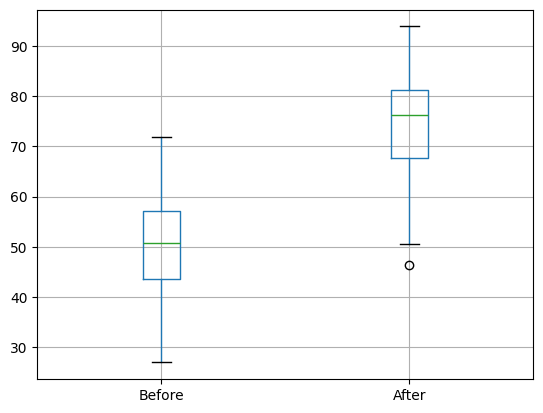

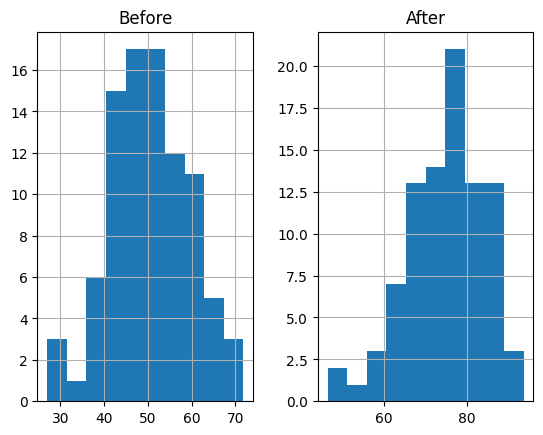

In [20]:

# descriptive stats
print(results.describe())
# box and whisker plot
results.boxplot()
pyplot.show()
# histogram
results.hist()
pyplot.show()

In [21]:
from pandas import read_csv
from scipy.stats import normaltest
from matplotlib import pyplot
result1 = read_csv('results1.csv', header=None)
value, p = normaltest(result1.values[:,0])
print(value, p)
if p >= 0.05:
	print('It is likely that result1 is normal')
else:
	print('It is unlikely that result1 is normal')

0.3791072696845035 0.8273283420823307
It is likely that result1 is normal


In [22]:
from pandas import read_csv
from scipy.stats import normaltest
from matplotlib import pyplot
result2 = read_csv('results2.csv', header=None)
value, p = normaltest(result2.values[:,0])
print(value, p)
if p >= 0.05:
	print('It is likely that result2 is normal')
else:
	print('It is unlikely that result2 is normal')

3.994542016277795 0.13570511652958406
It is likely that result2 is normal


In [23]:
from pandas import read_csv
from scipy.stats import ttest_ind
from matplotlib import pyplot
# load results1
result1 = read_csv('results1.csv', header=None)
values1 = result1.values[:,0]
# load results2
result2 = read_csv('results2.csv', header=None)
values2 = result2.values[:,0]
# calculate the significance
value, pvalue = ttest_ind(values1, values2, equal_var=True)
print(value, pvalue)
if pvalue > 0.05:
	print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
	print('Samples are likely drawn from different distributions (reject H0)')

-21.757742476708934 1.9056512854567842e-77
Samples are likely drawn from different distributions (reject H0)
